In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import operator

In [3]:
from pathlib import Path
from IPython.core.debugger import set_trace
# from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

import seaborn as sns

In [4]:
operator.add(1,2)
operator.eq(2,2)
operator.eq(2,1)
operator.eq.__name__

3

True

False

'eq'

In [5]:
def test_fnc(a,b,comp,comp_name=None):
    if not comp_name: comp_name=comp.__name__
    assert comp(a,b),f'{comp_name}\n{a}\n{b}'

In [6]:
test_fnc(1+1,2,operator.eq)

# Grab KMNIST

In [8]:
from pathlib import Path
from IPython.core.debugger import set_trace
# from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
import numpy

In [9]:
def get_data():
    input_path = Path("data")
    # Path to training images and corresponding labels provided as numpy arrays
    kmnist_train_images_path = input_path/"kmnist-train-imgs.npz"
    kmnist_train_labels_path = input_path/"kmnist-train-labels.npz"

    # Path to the test images and corresponding labels
    kmnist_test_images_path = input_path/"kmnist-test-imgs.npz"
    kmnist_test_labels_path = input_path/"kmnist-test-labels.npz"
    import numpy
    train = numpy.load(kmnist_train_images_path)['arr_0']
    train_labels = numpy.load(kmnist_train_labels_path)['arr_0']

    # Load the test data from the corresponding npz files
    test = numpy.load(kmnist_test_images_path)['arr_0']
    test_labels = numpy.load(kmnist_test_labels_path)['arr_0']
    x_train,y_train,x_valid,y_valid = map(tensor, (train,train_labels,test,test_labels))
    x_train = x_train.view(x_train.shape[0],-1).to(dtype=torch.float32)/255
    x_valid = x_valid.view(x_valid.shape[0],-1).to(dtype=torch.float32)/255
    
    return x_train,y_train,x_valid,y_valid

In [23]:

# Path to training images and corresponding labels provided as numpy arrays
kmnist_train_images_path = input_path/"kmnist-train-imgs.npz"
kmnist_train_labels_path = input_path/"kmnist-train-labels.npz"

# Path to the test images and corresponding labels
kmnist_test_images_path = input_path/"kmnist-test-imgs.npz"
kmnist_test_labels_path = input_path/"kmnist-test-labels.npz"

In [24]:
import numpy
train = numpy.load(kmnist_train_images_path)['arr_0']
train_labels = numpy.load(kmnist_train_labels_path)['arr_0']

# Load the test data from the corresponding npz files
test = numpy.load(kmnist_test_images_path)['arr_0']
test_labels = numpy.load(kmnist_test_labels_path)['arr_0']

In [25]:
train.shape,test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
x_train,y_train,x_valid,y_valid = map(tensor, (train,train_labels,test,test_labels))
n,c,_ = x_train.shape
y_train.min(), y_train.max()

(tensor(0, dtype=torch.uint8), tensor(9, dtype=torch.uint8))

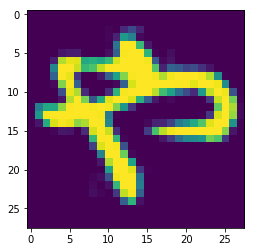

In [27]:
plt.imshow(x_train[1])

In [28]:
x_train = x_train.view(x_train.shape[0],-1)
x_valid = x_valid.view(x_valid.shape[0],-1)
x_train.shape,x_valid.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [32]:
x_train,x_valid = x_train.to(dtype=torch.float64),x_valid.to(dtype=torch.float64) # for matmul

# Matmul

In [15]:
temp=torch.randn(1000)
temp.mean()
temp.std()

tensor(0.0153)

tensor(0.9679)

In [18]:
def test_near(a,b):
    test_fnc(a,b,lambda x,y: torch.allclose(x,y,rtol=1e-3,atol=1e-5))

In [21]:
# dump pythob mm
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

In [35]:
weights = torch.randn(784,10)
bias = torch.zeros(10) 

In [37]:
m1 = x_valid[:5]
m2 = weights
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [48]:
test_near(matmul(m1,m2),
          torch.mm(m1.to(dtype=torch.float32),m2))

In [49]:
%%timeit
_ = matmul(m1,m2)

585 ms ± 7.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Use broadcasting

In [72]:
def matmul_bc(m1,m2):
    m1 = m1.to(dtype=torch.float32)
    result = torch.zeros(m1.shape[0],m2.shape[1])
    for i in range(m1.shape[0]):
        m1_row = m1[i,:]
        result[i,:] = (m1_row[:,None] * m2).sum(dim=0)
    return result

In [75]:
%timeit -n 10 _=matmul_bc(m1, m2)

221 µs ± 99.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [74]:
test_near(matmul_bc(m1,m2),
          torch.mm(m1.to(dtype=torch.float32),m2))

# Normalization with mean 0 and std ?

In [9]:
import seaborn as sns
import pandas as pd

In [10]:
def sample_normal_dist(mean,std):
    temp = torch.distributions.Normal(tensor([float(mean)]), tensor([float(std)]))
    temps = temp.sample(torch.Size([1000])).squeeze()
    print(pd.Series(temps.tolist()).describe())
    sns.distplot(temps.tolist())

count    1000.000000
mean       -0.043652
std         0.991721
min        -3.238986
25%        -0.713822
50%        -0.012155
75%         0.665153
max         2.843607
dtype: float64


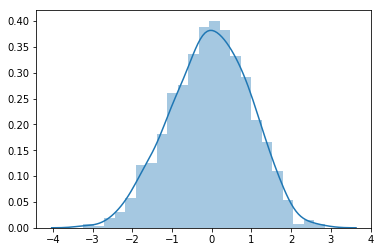

In [65]:
sample_normal_dist(0,1)

count    1000.000000
mean       -0.005774
std         0.484675
min        -1.432053
25%        -0.332046
50%         0.013195
75%         0.321444
max         1.578680
dtype: float64


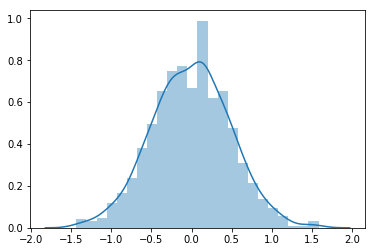

In [66]:
sample_normal_dist(0,0.5)

count    1000.000000
mean       -0.007684
std         0.198552
min        -0.594672
25%        -0.134927
50%        -0.013428
75%         0.125530
max         0.688661
dtype: float64


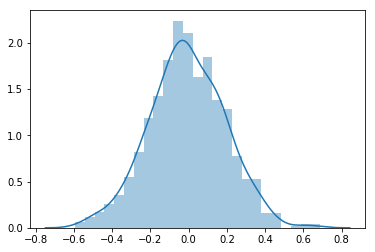

In [69]:
sample_normal_dist(0,0.2)

count    1000.000000
mean       -0.000017
std         0.001003
min        -0.003257
25%        -0.000662
50%        -0.000032
75%         0.000614
max         0.004157
dtype: float64


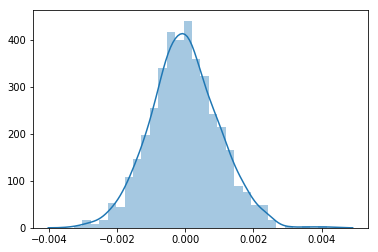

In [34]:
sample_normal_dist(0,0.001)

count    1000.000000
mean       -0.024887
std         1.511351
min        -4.615694
25%        -1.052973
50%        -0.039089
75%         0.922986
max         5.221451
dtype: float64


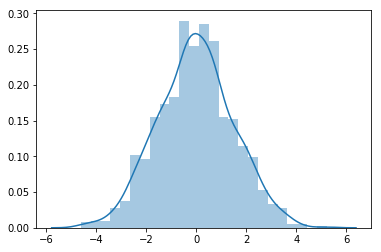

In [67]:
sample_normal_dist(0,1.5)

# Forward pass

In [10]:
x_train,y_train,x_valid,y_valid = get_data()

x_train.mean(),x_train.std()

(tensor(0.1904), tensor(0.3475))

In [11]:
def normalize(x,mean,std): return (x-mean)/std
train_mean,train_std = x_train.mean(),x_train.std()

x_train = normalize(x_train,train_mean,train_std)
x_valid = normalize(x_valid,train_mean,train_std)


In [12]:
x_train.mean(),x_train.std(),x_train.max(),x_train.min()
x_valid.mean(),x_valid.std(),x_valid.max(),x_valid.min()

(tensor(-4.3871e-06), tensor(1.), tensor(2.3301), tensor(-0.5479))

(tensor(-0.0205), tensor(0.9801), tensor(2.3301), tensor(-0.5479))

/home/quantran/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


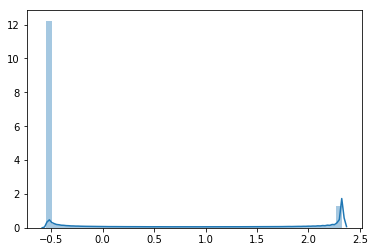

In [13]:
sns.distplot(x_valid.view(-1).tolist())

## What Kaiming He initialization does: make X@w+b mean 0 and std 1

In [13]:
(n,m),c=x_train.shape,y_train.max()+1

In [14]:
n,m,c

(60000, 784, tensor(10, dtype=torch.uint8))

In [15]:
def lin(x, w, b): return x@w + b

## With random normal dist weight init (no Kaiming He init)

(tensor(-0.4889), tensor(27.9990))

/home/quantran/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


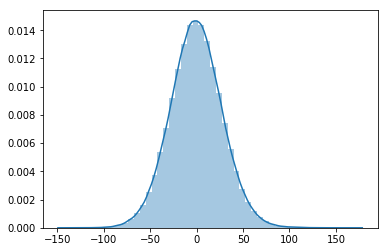

In [17]:
n_hidden = 50
w1 = torch.randn(m,n_hidden)
w2 = torch.randn(n_hidden,1)
b1 = torch.zeros(n_hidden)
b2 = torch.zeros(1)
o = lin(x_valid,w1,b1)
o.mean(),o.std()
sns.distplot(o.view(-1).tolist())

(tensor(65.8661), tensor(162.3990))

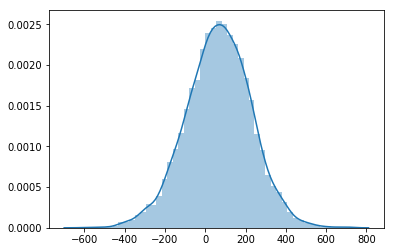

In [18]:
act2 = lin(o,w2,b2)
act2.mean(),act2.std()
sns.distplot(act2.view(-1).tolist()) 

Activation grows real fast, prone to exploding gradient

## Let see how fast does it take for input to explode/vanish using normal dist weight init (no xavier/kaiming)

With mean 0 std 1, at 28th iteration input explodes

In [19]:
x = torch.randn(512)
a = torch.randn(512,512)
a.mean(),a.std()

for i in range(100): 
    x = a @ x
    if x.std() != x.std(): break
print(i)
print(x.mean(),x.std())

(tensor(-0.0010), tensor(1.0013))

27
tensor(nan) tensor(nan)


With mean 0 std 0.01, at 69th iteration input vanishes

In [20]:
x = torch.randn(512)
a = torch.randn(512,512)*0.01
a.mean(),a.std()

for i in range(100): 
    x = a @ x
    if x.std() == 0.0: break
print(i)
print(x.mean(),x.std())

(tensor(4.4182e-06), tensor(0.0100))

68
tensor(0.) tensor(0.)


Try with different std

In [26]:
x = torch.randn(512)
a = torch.randn(512,512)*0.02
a.mean(),a.std()

for i in range(200): 
    x = a @ x
    if x.std() == 0.0: break
print(i)
print(x.mean(),x.std())

(tensor(-4.5533e-05), tensor(0.0200))

129
tensor(0.) tensor(0.)


With std 0.04, input vanishes, but at std 0.05, input explodes!

In [31]:
x = torch.randn(512)
a = torch.randn(512,512)*0.04
a.mean(),a.std()

for i in range(200): 
    x = a @ x
print(i)
print(x.mean(),x.std())

(tensor(-6.2758e-06), tensor(0.0401))

199
tensor(3.2610e-09) tensor(1.9282e-07)


In [33]:
x = torch.randn(512)
a = torch.randn(512,512)*0.05
a.mean(),a.std()

for i in range(200): 
    x = a @ x
print(i)
print(x.mean(),x.std())

(tensor(-0.0001), tensor(0.0499))

199
tensor(-5.6397e+11) tensor(7.0924e+12)


In [43]:
x = torch.randn(512)
a = torch.randn(512,512) / math.sqrt(512)
a.mean(),a.std()

for i in range(200): 
    x = a @ x
print(i)
print(x.mean(),x.std())

(tensor(8.4904e-05), tensor(0.0443))

199
tensor(0.0606) tensor(3.7401)


## With Original Xavier init

In [71]:
n_hidden = 50
w1 = torch.randn(m,n_hidden)/math.sqrt(m)
b1 = torch.zeros(n_hidden)
w2 = torch.randn(n_hidden,1)/math.sqrt(n_hidden)
b2 = torch.zeros(1)


w1 and w2 will have mean 0 and std 1/ sqrt(# of layers)

In [72]:
o = lin(x_valid,w1,b1)
o.mean(),o.std()

(tensor(0.0116), tensor(0.9626))

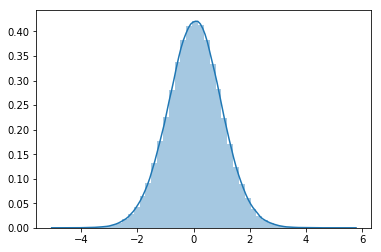

In [68]:
sns.distplot(o.view(-1).tolist())

(tensor(0.1789), tensor(0.8119))

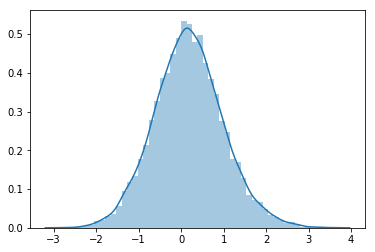

In [73]:
act2 = lin(o,w2,b2)
act2.mean(),act2.std()
sns.distplot(act2.view(-1).tolist()) 

With this initialization, X@W+b has mean 0 and std 1

# Effect of RELU on original Xavier init

But then we have to apply activation, which will ignore our effort to make mean 0 std 1

For RELU, we disregard half of the data, so mean will be a bit more than 0, std is halved

In [44]:
def relu(x): return x.clamp_min(0.)

(tensor(0.3851), tensor(0.5646))

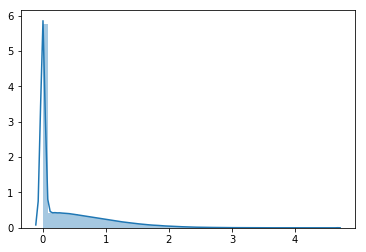

In [45]:
act = relu(lin(x_valid,w1,b1))
act.mean(),act.std() # std/2
sns.distplot(act.view(-1).tolist())

(tensor(0.2831), tensor(0.3089))

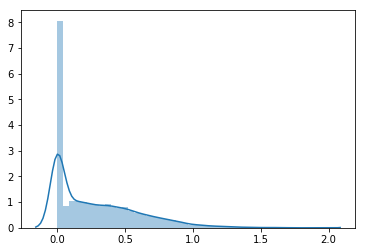

In [47]:
act2 = relu(lin(act,w2,b2))
act2.mean(),act2.std() # std /4

sns.distplot(act2.view(-1).tolist()) 

# With Kaiming He init (with RELU)

In [46]:
m

784

In [54]:
n_hidden = 50
w1 = torch.randn(m,n_hidden)*math.sqrt(2/m) # mean 0, std: sqrt(2/# layers)
b1 = torch.zeros(n_hidden)
w2 = torch.randn(n_hidden,1)*math.sqrt(2/n_hidden)
b2 = torch.zeros(1)

In [55]:
w1.mean(),w1.std(),w1.var()
w2.mean(),w2.std(),w2.var()

(tensor(4.2059e-05), tensor(0.0505), tensor(0.0026))

(tensor(-0.0141), tensor(0.1492), tensor(0.0223))

In [41]:
def relu(x): return x.clamp_min(0.)

(tensor(-0.0616), tensor(1.9692), tensor(1.4033))

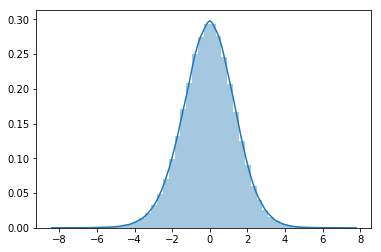

In [42]:
o = lin(x_valid,w1,b1)
o.mean(),o.var(),o.std()
sns.distplot(o.view(-1).tolist())

(tensor(0.5215), tensor(0.6220), tensor(0.7887))

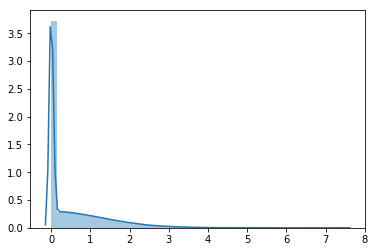

In [43]:
#apply relu
o = relu(o)
o.mean(),o.var(),o.std()
sns.distplot(o.view(-1).tolist())

(tensor(0.9147), tensor(0.9786), tensor(0.9892))

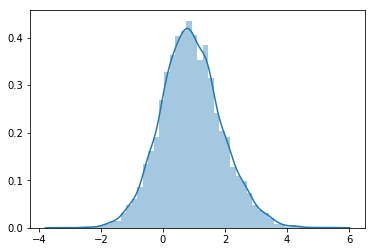

In [44]:
act2 = lin(o,w2,b2)
act2.mean(),act2.var(),act2.std()
sns.distplot(act2.view(-1).tolist()) 

(tensor(1.0005), tensor(0.7375), tensor(0.8588))

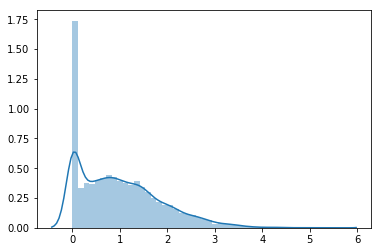

In [45]:
act2 = relu(act2)
act2.mean(),act2.var(),act2.std()
sns.distplot(act2.view(-1).tolist()) 

# Use torch library for weight init

In [49]:
from torch.nn import init

In [70]:
w1 = torch.zeros(m,n_hidden)
init.kaiming_normal_(w1, mode='fan_out')

tensor([[-0.0347,  0.0010,  0.0591,  ..., -0.0145, -0.0630, -0.0050],
        [-0.0321, -0.0218, -0.0465,  ..., -0.0192, -0.0606,  0.0618],
        [ 0.0164,  0.0365, -0.0340,  ...,  0.0631, -0.1130, -0.0003],
        ...,
        [-0.1173, -0.0354, -0.0144,  ..., -0.0467, -0.0291,  0.0571],
        [ 0.0446,  0.0071,  0.0603,  ...,  0.0302,  0.0160,  0.0173],
        [ 0.0242,  0.0340,  0.0216,  ...,  0.0497, -0.0062, -0.0244]])

In [75]:
t = relu(lin(x_valid, w1, b1))
t.mean(),t.std()
w1.mean(),w1.std()

(tensor(0.5629), tensor(0.8161))

(tensor(0.0002), tensor(0.0506))